In [4]:
import numpy as np
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):

            for idx, x_i in enumerate(X):

                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                #update rule
                update = self.lr * (y_[idx] - y_predicted)

                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)    

(237, 2)
(237,)
Perceptron: Accuracy:  0.8833333333333333


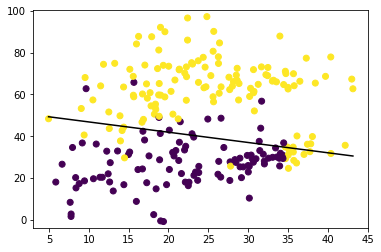

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import os

path=os.path.join('C:' + os.sep,'Users','Pranali Patil','ML Datasets','classification.csv')
df = pd.read_csv(path)

X = df.iloc[:,0:-1].values
Y = df.iloc[:, -1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2)
p = Perceptron(learning_rate=0.01, n_iters=1000)

print(X_train.shape)
print(Y_train.shape)

p.fit(X_train, Y_train)
predictions = p.predict(X_test)

print("Perceptron: Accuracy: ", accuracy_score(Y_test, predictions))

#For plotting graph
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=Y_train)
x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]
ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")
ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])
plt.show()